# Análise Exploratória de Dados (EDA)

Nesta aula, vamos trabalhar com um case da plataforma Spotify, analisando alguns álbuns e as músicas presentes neles.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'data\dataset_rolling_stones.xlsx'

df_rolling_stones = pd.read_excel(url)

df_rolling_stones.head()

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996000,0.932,-12913.0,0.1100,118001.0,0.0302,33,48640
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233000,0.961,-4803.0,0.0759,131455.0,0.3180,34,253173
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,0.4160,0.386,0.969,0.400000,0.956,-4936.0,0.1150,130066.0,0.3130,34,263160
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,0.5670,0.369,0.985,0.000107,0.895,-5535.0,0.1930,132994.0,0.1470,32,305880
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,0.4000,0.303,0.969,0.055900,0.966,-5098.0,0.0930,130533.0,0.2060,32,305106


In [3]:
df_rolling_stones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              1610 non-null   object        
 1   album             1610 non-null   object        
 2   release_date      1610 non-null   datetime64[ns]
 3   track_number      1610 non-null   int64         
 4   acousticness      1610 non-null   float64       
 5   danceability      1610 non-null   float64       
 6   energy            1610 non-null   float64       
 7   instrumentalness  1610 non-null   float64       
 8   liveness          1610 non-null   float64       
 9   loudness          1610 non-null   float64       
 10  speechiness       1610 non-null   float64       
 11  tempo             1610 non-null   float64       
 12  valence           1610 non-null   float64       
 13  popularity        1610 non-null   int64         
 14  duration_ms       1610 n

Vamos analisar a data de estreia da banda no mercado musical e o momento em que ela deixou de lançar novas músicas.

In [4]:
print("Data inicial: ", df_rolling_stones['release_date'].min())

Data inicial:  1964-04-16 00:00:00


In [5]:
print("Data final: ", df_rolling_stones['release_date'].max())

Data final:  2022-06-10 00:00:00


Vamos analisar se existe dados null na nossa base, pois elas interferem muito na nossa analise.

In [6]:
df_rolling_stones.isnull().sum()

name                0
album               0
release_date        0
track_number        0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

Agora iremos visualizar se possue dados duplicados na nossa base.

In [7]:
df_rolling_stones.duplicated().sum()

6

Agora iremos verificar quais são essas linhas duplicadas.

In [8]:
df_rolling_stones[df_rolling_stones.duplicated()]

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
928,Some Girls - Remastered,Some Girls (Deluxe Version),1978-06-09,4,0.5270,0.474,0.938,0.520000,0.299,-2643.0,0.0898,71995.00,0.505,21,276933
929,Lies - Remastered,Some Girls (Deluxe Version),1978-06-09,5,0.4370,0.382,0.997,0.950000,0.617,-1568.0,0.1880,162428.00,0.563,16,191266
935,Claudine,Some Girls (Deluxe Version),1978-06-09,1,0.0144,0.439,0.977,0.022100,0.383,-4386.0,0.1280,105124.00,0.364,17,222253
939,No Spare Parts,Some Girls (Deluxe Version),1978-06-09,5,0.2400,0.594,0.762,0.000015,0.712,-5145.0,0.0292,72648.00,0.540,19,270466
940,Don't Be A Stranger,Some Girls (Deluxe Version),1978-06-09,6,0.0610,0.720,0.867,0.029700,0.385,-5871.0,0.0390,127329.00,0.847,15,246266
946,Petrol Blues,Some Girls (Deluxe Version),1978-06-09,12,0.7690,0.835,0.621,0.114000,0.116,-8007.0,0.0406,115.87,0.336,13,95626


Um álbum pode conter várias músicas, e isso, neste contexto, não impacta diretamente nossa análise. No entanto, é fundamental sempre realizar essa validação para garantir a consistência dos dados.

## Análise Exploratória

In [9]:
df_rolling_stones.describe()

,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
count,1610,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.00000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,1992-04-23 12:57:14.534161536,8.613665,0.250475,0.468860,0.792352,0.164170,0.49173,-6406.640075,0.069512,114078.725261,0.582165,20.788199,257736.488199
min,1964-04-16 00:00:00,1.000000,0.000009,0.104000,0.141000,0.000000,0.02190,-24408.000000,0.023200,65.990000,0.000000,0.000000,21000.000000
25%,1970-09-04 00:00:00,4.000000,0.058350,0.362250,0.674000,0.000219,0.15300,-8829.500000,0.036500,98996.500000,0.404250,13.000000,190613.000000
50%,1986-03-24 00:00:00,7.000000,0.183000,0.458000,0.848500,0.013750,0.37950,-6179.000000,0.051200,120319.000000,0.583000,20.000000,243093.000000
75%,2017-12-01 00:00:00,11.000000,0.403750,0.578000,0.945000,0.179000,0.89375,-4254.750000,0.086600,140853.750000,0.778000,27.000000,295319.750000
max,2022-06-10 00:00:00,47.000000,0.994000,0.887000,0.999000,0.996000,0.99800,-2.310000,0.624000,216304.000000,0.974000,80.000000,981866.000000
std,NaN,6.560220,0.227397,0.141775,0.179886,0.276249,0.34910,3474.285941,0.051631,46196.602233,0.231253,12.426859,108333.474920


Conseguimos perceber que a coluna *duration_ms* possue valores muito grande, sendo assim, seria mais fácil analisarmos ela com a medida em minutos.

In [10]:
df_rolling_stones['duration_min'] = df_rolling_stones['duration_ms']/60000

df_rolling_stones.head()

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duration_min
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996000,0.932,-12913.0,0.1100,118001.0,0.0302,33,48640,0.810667
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233000,0.961,-4803.0,0.0759,131455.0,0.3180,34,253173,4.219550
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,0.4160,0.386,0.969,0.400000,0.956,-4936.0,0.1150,130066.0,0.3130,34,263160,4.386000
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,0.5670,0.369,0.985,0.000107,0.895,-5535.0,0.1930,132994.0,0.1470,32,305880,5.098000
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,0.4000,0.303,0.969,0.055900,0.966,-5098.0,0.0930,130533.0,0.2060,32,305106,5.085100


In [11]:
df_rolling_stones.describe()

,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duration_min
count,1610,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.00000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,1992-04-23 12:57:14.534161536,8.613665,0.250475,0.468860,0.792352,0.164170,0.49173,-6406.640075,0.069512,114078.725261,0.582165,20.788199,257736.488199,4.295608
min,1964-04-16 00:00:00,1.000000,0.000009,0.104000,0.141000,0.000000,0.02190,-24408.000000,0.023200,65.990000,0.000000,0.000000,21000.000000,0.350000
25%,1970-09-04 00:00:00,4.000000,0.058350,0.362250,0.674000,0.000219,0.15300,-8829.500000,0.036500,98996.500000,0.404250,13.000000,190613.000000,3.176883
50%,1986-03-24 00:00:00,7.000000,0.183000,0.458000,0.848500,0.013750,0.37950,-6179.000000,0.051200,120319.000000,0.583000,20.000000,243093.000000,4.051550
75%,2017-12-01 00:00:00,11.000000,0.403750,0.578000,0.945000,0.179000,0.89375,-4254.750000,0.086600,140853.750000,0.778000,27.000000,295319.750000,4.921996
max,2022-06-10 00:00:00,47.000000,0.994000,0.887000,0.999000,0.996000,0.99800,-2.310000,0.624000,216304.000000,0.974000,80.000000,981866.000000,16.364433
std,NaN,6.560220,0.227397,0.141775,0.179886,0.276249,0.34910,3474.285941,0.051631,46196.602233,0.231253,12.426859,108333.474920,1.805558


Agora iremos análisar a duração em minutos por albúm.

In [12]:
df_rolling_stones.groupby('album')['duration_min'].mean()

album
12 X 5                              2.682068
12 x 5                              2.682772
A Bigger Bang (2009 Re-Mastered)    4.016356
A Bigger Bang (Live)                5.176630
Aftermath                           3.899185
                                      ...   
Undercover                          4.492750
Undercover (2009 Re-Mastered)       4.497595
Voodoo Lounge (Remastered 2009)     4.118779
Voodoo Lounge Uncut (Live)          5.248507
got LIVE if you want it!            2.762532
Name: duration_min, Length: 90, dtype: float64

Agora iremos construir um gráfico de barras, para conseguirmos visualizar melhor qual a duração de cada álbum, e qual seria o de maior duração ou o de menor.

In [13]:
df_maior_duracao_album = df_rolling_stones.groupby('album')['duration_min'].mean().sort_values(ascending=False)

In [14]:
df_maior_duracao_album

album
Havana Moon (Live)                                                      6.632819
Bridges To Bremen (Live)                                                6.332265
Jamming With Edward                                                     6.042794
Live At The Checkerboard Lounge                                         6.009647
Totally Stripped - Paris (Live)                                         5.947430
                                                                          ...   
Out Of Our Heads (UK)                                                   2.464643
Out Of Our Heads (UK Sequence)                                          2.449274
December's Children (and everybody's)                                   2.408976
December’s Children (And Everybody’s)                                   2.408532
Live 1965: Music From Charlie Is My Darling (Live From England/1965)    2.146082
Name: duration_min, Length: 90, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

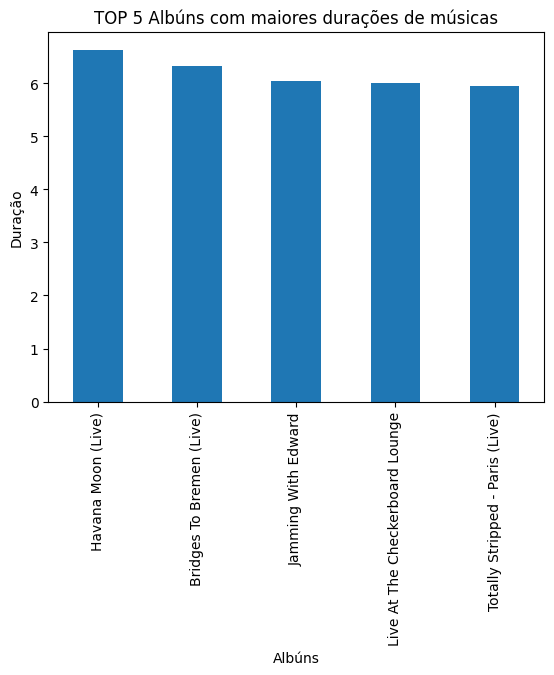

In [15]:
df_maior_duracao_album.head(5).plot(kind='bar')
plt.xlabel("Albúns")
plt.ylabel("Duração")
plt.title("TOP 5 Albúns com maiores durações de músicas")
plt.show

In [16]:
df_menor_duracao_album = df_rolling_stones.groupby('album')['duration_min'].mean().sort_values(ascending=True)

In [17]:
df_menor_duracao_album

album
Live 1965: Music From Charlie Is My Darling (Live From England/1965)    2.146082
December’s Children (And Everybody’s)                                   2.408532
December's Children (and everybody's)                                   2.408976
Out Of Our Heads (UK Sequence)                                          2.449274
Out Of Our Heads (UK)                                                   2.464643
                                                                          ...   
Totally Stripped - Paris (Live)                                         5.947430
Live At The Checkerboard Lounge                                         6.009647
Jamming With Edward                                                     6.042794
Bridges To Bremen (Live)                                                6.332265
Havana Moon (Live)                                                      6.632819
Name: duration_min, Length: 90, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

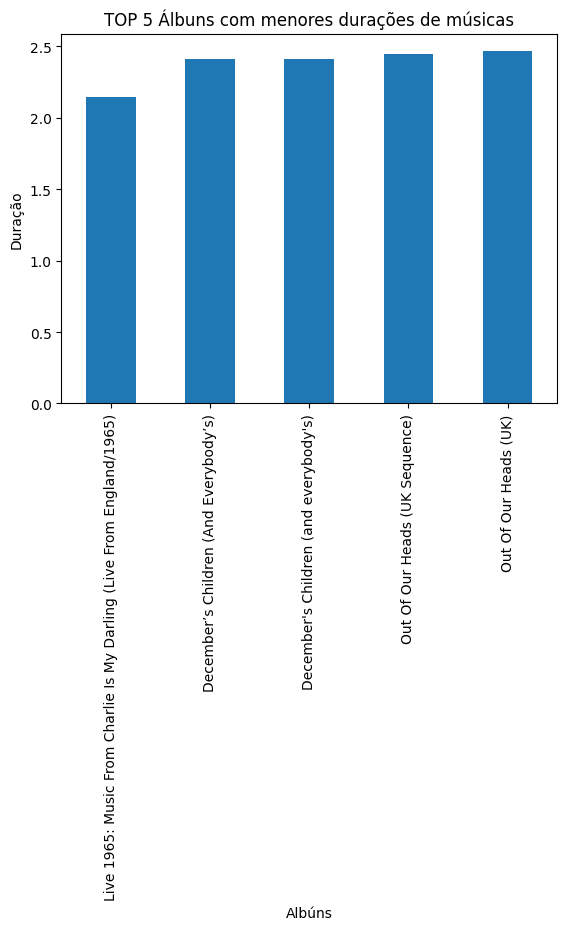

In [18]:
df_menor_duracao_album.head(5).plot(kind='bar')
plt.xlabel("Albúns")
plt.ylabel("Duração")
plt.title("TOP 5 Álbuns com menores durações de músicas")
plt.show

A função **value_counts()** ele irá contar quantas variedades de valores possue na nossa coluna.

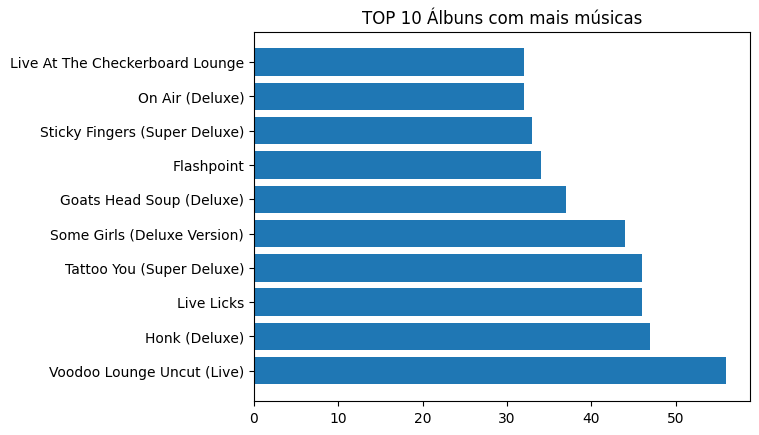

In [19]:
top_albuns = df_rolling_stones['album'].value_counts().head(10)
plt.barh(top_albuns.index, top_albuns.values)
plt.title("TOP 10 Álbuns com mais músicas")
plt.show()

Agora vamos analisar como tem se comportado a popularidade dos álbuns na última década.

Iremos utilizar a função **between** para pegar os registros em um determinado intervalo de tempo.

In [20]:
df_ultima_decada = df_rolling_stones[df_rolling_stones['release_date'].between(pd.to_datetime('2011'), pd.to_datetime('2020'))]

In [21]:
df_por_album = df_ultima_decada.groupby('album')['popularity'].sum().sort_values(ascending=False).head(10)

In [22]:
df_por_album

album
Honk (Deluxe)                      1232
Voodoo Lounge Uncut (Live)          654
On Air (Deluxe)                     573
Live At The Checkerboard Lounge     482
Havana Moon (Live)                  445
Bridges To Buenos Aires (Live)      433
Blue & Lonesome                     419
Bridges To Bremen (Live)            396
Some Girls: Live In Texas '78       344
Ladies & Gentlemen (Live)           343
Name: popularity, dtype: int64

In [23]:
total_popularidade = df_por_album.sum()

df_porcentagem = (df_por_album/ total_popularidade) * 100

In [24]:
labels = df_porcentagem.index.tolist()

sizes = df_porcentagem.values.tolist()

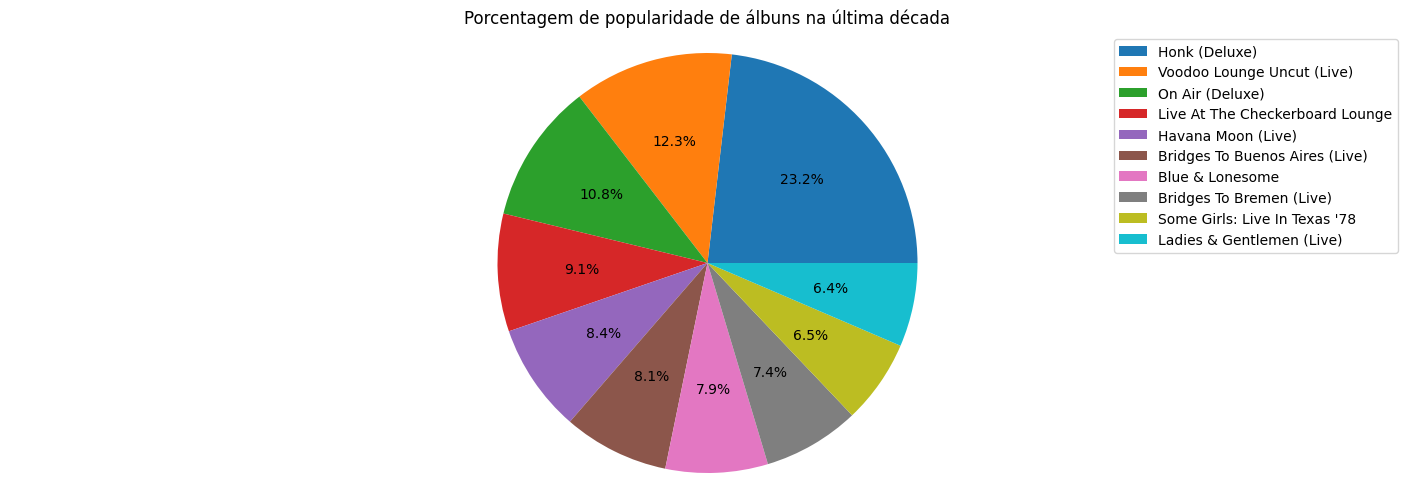

In [25]:
figura, grafico = plt.subplots(figsize=(18,6))
grafico.pie(sizes, autopct="%1.1f%%")
grafico.axis('equal')
plt.title("Porcentagem de popularidade de álbuns na última década")
plt.legend(labels, loc='best')
plt.show()

### Outliers 

são valores que se distanciam significativamente da maioria dos dados de um conjunto. Eles podem indicar variabilidade natural, erros de medição, falhas no processo de coleta de dados.

Iremos utilizar o gráfico boxplot para visualizarmos essa analise, pois ele demonstra a distruibuição dos nossos dados.

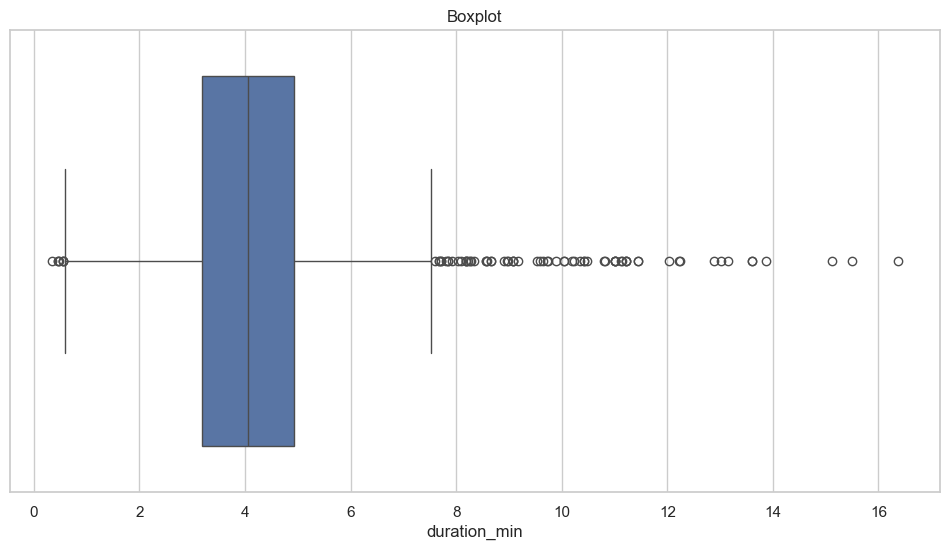

In [26]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(figsize=(12,6))
sns.boxplot(x='duration_min', data= df_rolling_stones)
axes.set_title("Boxplot")
plt.show()

Grafico violin.

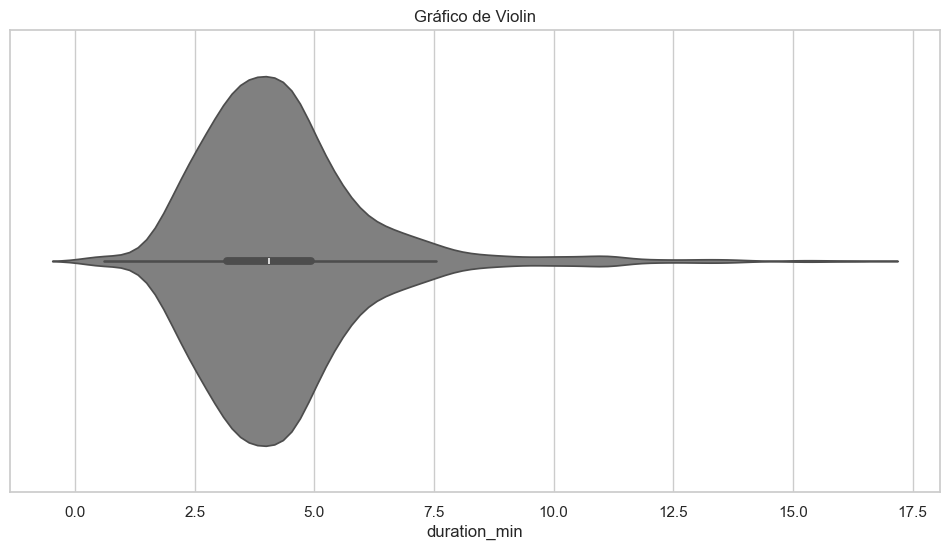

In [27]:
fig, axes = plt.subplots(figsize=(12,6))
sns.violinplot(x='duration_min', data= df_rolling_stones, color="gray")
axes.set_title("Gráfico de Violin")
plt.show()

Iremos juntar ambos os gráficos agora.

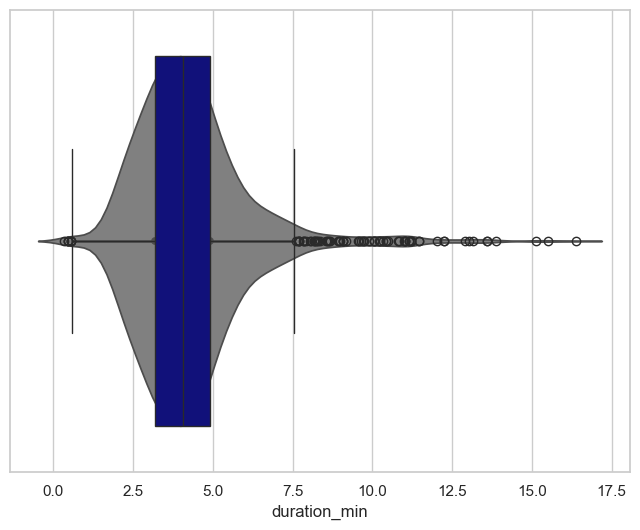

In [28]:
fig, ax = plt.subplots(figsize=(8,6))
sns.violinplot(x='duration_min', data= df_rolling_stones, ax=ax,color="gray")
sns.boxplot(x='duration_min', data= df_rolling_stones,ax=ax, whis=1.5, color="darkblue")
axes.set_title("Gráfico de Violin e Boxplot")
plt.show()

A ideia agora é ver se esses dados que estão fora dos nossos padrões tem av em questão de serem músicas ao vivos utilizando a variável **liveness** presente na nossa base de dados.

In [29]:
df_rolling_stones.head(5)

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duration_min
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996000,0.932,-12913.0,0.1100,118001.0,0.0302,33,48640,0.810667
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233000,0.961,-4803.0,0.0759,131455.0,0.3180,34,253173,4.219550
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,0.4160,0.386,0.969,0.400000,0.956,-4936.0,0.1150,130066.0,0.3130,34,263160,4.386000
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,0.5670,0.369,0.985,0.000107,0.895,-5535.0,0.1930,132994.0,0.1470,32,305880,5.098000
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,0.4000,0.303,0.969,0.055900,0.966,-5098.0,0.0930,130533.0,0.2060,32,305106,5.085100


Quanto mais perto de 1, significa que esta música é ao vivo.

Iremos fazer uma função para classificar as nossas músicas de acordo com a coluna escolhida.

In [30]:
def classica_musica_ao_vivo(df):
    if df['liveness'] >= 0.8:
        return True
    else:
        return False

In [31]:
df_rolling_stones['ao_vivo'] = df_rolling_stones.apply(classica_musica_ao_vivo, axis=1)

In [32]:
df_rolling_stones

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duration_min,ao_vivo
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996000,0.9320,-12913.0,0.1100,118001.00,0.0302,33,48640,0.810667,True
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233000,0.9610,-4803.0,0.0759,131455.00,0.3180,34,253173,4.219550,True
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,0.4160,0.386,0.969,0.400000,0.9560,-4936.0,0.1150,130066.00,0.3130,34,263160,4.386000,True
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,0.5670,0.369,0.985,0.000107,0.8950,-5535.0,0.1930,132994.00,0.1470,32,305880,5.098000,True
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,0.4000,0.303,0.969,0.055900,0.9660,-5098.0,0.0930,130533.00,0.2060,32,305106,5.085100,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,Carol,The Rolling Stones,1964-04-16,8,0.1570,0.466,0.932,0.006170,0.3240,-9214.0,0.0429,177.34,0.9670,39,154080,2.568000,False
1606,Tell Me,The Rolling Stones,1964-04-16,9,0.0576,0.509,0.706,0.000002,0.5160,-9427.0,0.0843,122015.00,0.4460,36,245266,4.087767,False
1607,Can I Get A Witness,The Rolling Stones,1964-04-16,10,0.3710,0.790,0.774,0.000000,0.0669,-7961.0,0.0720,97035.00,0.8350,30,176080,2.934667,False
1608,You Can Make It If You Try,The Rolling Stones,1964-04-16,11,0.2170,0.700,0.546,0.000070,0.1660,-9567.0,0.0622,102634.00,0.5320,27,121680,2.028000,False


Agora iremos agrupar as músicas que são ao vivo, para conseguimos contar quantos registros existem.

In [33]:
df_rolling_stones.groupby('ao_vivo')['ao_vivo'].count()

ao_vivo
False    1112
True      498
Name: ao_vivo, dtype: int64

Agora iremos dividir esses dois grupos em um dataframe, para podermos calcular a média de durações das músicas, e podermos análisar se realmente possue essa diferença.

In [34]:
df_gravado_em_estudio = df_rolling_stones[df_rolling_stones['ao_vivo'] == False]

df_show_ao_vivo = df_rolling_stones[df_rolling_stones['ao_vivo'] == True]

In [35]:
df_gravado_em_estudio.head()

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duration_min,ao_vivo
5,Monkey Man - Live,Licked Live In NYC,2022-06-10,6,0.2750,0.340,0.956,0.12500,0.741,-5539.0,0.0915,101628.0,0.125,31,244293,4.071550,False
23,Honky Tonk Women - Live At The El Mocambo 1977,Live At The El Mocambo,2022-05-13,1,0.1620,0.430,0.901,0.01100,0.694,-6215.0,0.0450,112077.0,0.890,32,216546,3.609100,False
25,Hand Of Fate - Live At The El Mocambo 1977,Live At The El Mocambo,2022-05-13,3,0.0654,0.477,0.899,0.03760,0.727,-6189.0,0.0425,129991.0,0.805,29,267866,4.464433,False
26,Route 66 - Live At The El Mocambo 1977,Live At The El Mocambo,2022-05-13,4,0.0975,0.473,0.923,0.00157,0.722,-6204.0,0.0791,144625.0,0.792,30,193653,3.227550,False
28,Crazy Mama - Live At The El Mocambo 1977,Live At The El Mocambo,2022-05-13,6,0.0288,0.447,0.883,0.00554,0.726,-6266.0,0.0371,117604.0,0.556,29,299213,4.986883,False


In [36]:
df_show_ao_vivo.head()

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duration_min,ao_vivo
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996000,0.932,-12913.0,0.1100,118001.0,0.0302,33,48640,0.810667,True
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233000,0.961,-4803.0,0.0759,131455.0,0.3180,34,253173,4.219550,True
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,0.4160,0.386,0.969,0.400000,0.956,-4936.0,0.1150,130066.0,0.3130,34,263160,4.386000,True
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,0.5670,0.369,0.985,0.000107,0.895,-5535.0,0.1930,132994.0,0.1470,32,305880,5.098000,True
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,0.4000,0.303,0.969,0.055900,0.966,-5098.0,0.0930,130533.0,0.2060,32,305106,5.085100,True


In [37]:
print("Média das músicas ao vivo: ", df_show_ao_vivo['duration_min'].mean())

Média das músicas ao vivo:  5.088648962516734


In [38]:
print("Média das músicas gravadas: ", df_gravado_em_estudio['duration_min'].mean())

Média das músicas gravadas:  3.940451363908873


## Agora iremos responder algumas perguntas com os nossos dados.

Agora vamos utilizar o gráfico de histograma para analisar melhor os nossos dados contínuos. Esse tipo de gráfico nos permite visualizar a distribuição dos valores ao agrupar os dados em intervalos, facilitando a identificação de padrões, tendências e possíveis outliers.

In [39]:
df_studio = df_gravado_em_estudio.groupby('album')['loudness'].sum()

In [40]:
df_ao_vivo = df_show_ao_vivo.groupby('album')['loudness'].sum()

In [41]:
df_studio

album
12 X 5                             -112195.38
12 x 5                             -122513.00
A Bigger Bang (2009 Re-Mastered)    -54080.72
A Bigger Bang (Live)                 -4771.57
Aftermath                          -100339.96
                                      ...    
Undercover                         -101938.00
Undercover (2009 Re-Mastered)       -38623.12
Voodoo Lounge (Remastered 2009)     -91216.86
Voodoo Lounge Uncut (Live)          -87916.84
got LIVE if you want it!            -55802.00
Name: loudness, Length: 88, dtype: float64

In [42]:
df_ao_vivo

album
A Bigger Bang (Live)                                                             -84835.44
Bridges To Bremen (Live)                                                         -56335.55
Bridges To Buenos Aires (Live)                                                   -78869.95
Dirty Work                                                                        -2701.00
Dirty Work (Remastered 2009)                                                      -2688.00
Flashpoint                                                                      -112831.27
From The Vault: No Security - San Jose 1999 (Live)                               -79358.40
Get Yer Ya Yas Out                                                               -79054.33
Get Yer Ya-Ya's Out! (Remastered)                                                -53731.00
Get Yer Ya-Ya's Out! The Rolling Stones In Concert (40th Anniversary Edition)    -85996.00
Goats Head Soup (Deluxe)                                                         -21

Agora iremos criar dois gráficos um do lado do outro.

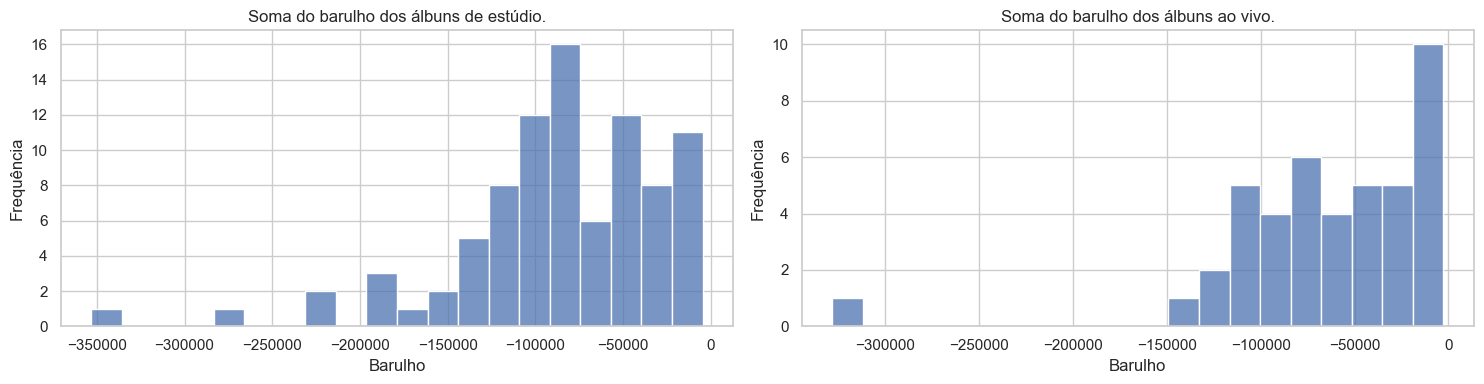

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

sns.histplot(data=df_studio, bins=20, ax=axes[0])
axes[0].set_title("Soma do barulho dos álbuns de estúdio.")
axes[0].set_xlabel("Barulho")
axes[0].set_ylabel("Frequência")

sns.histplot(data=df_ao_vivo, bins=20, ax=axes[1])
axes[1].set_title("Soma do barulho dos álbuns ao vivo.")
axes[1].set_xlabel("Barulho")
axes[1].set_ylabel("Frequência")

fig.tight_layout()
plt.show()


Agora iremos utilizar um gráfico de densidade.

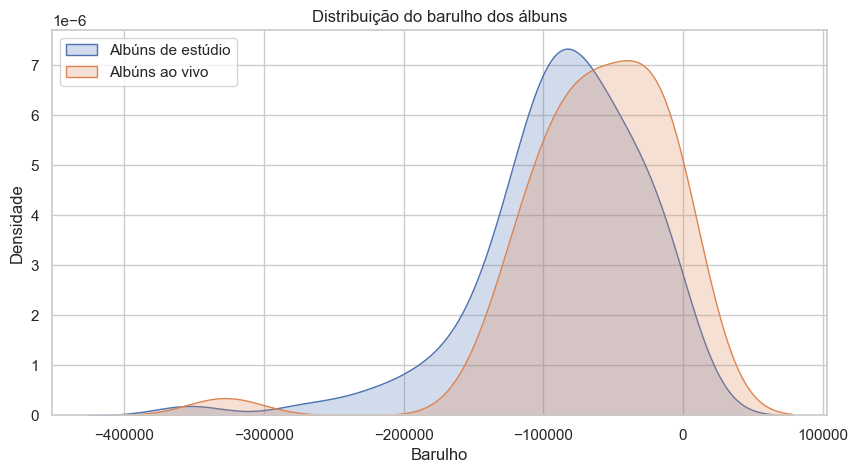

In [44]:
plt.figure(figsize=(10,5))

sns.kdeplot(data=df_studio, label="Albúns de estúdio", fill=True)
sns.kdeplot(data=df_ao_vivo, label="Albúns ao vivo", fill=True)

plt.title("Distribuição do barulho dos álbuns")
plt.xlabel("Barulho")
plt.ylabel("Densidade")
plt.legend()
plt.show()

## Testes de Análise

Os gráficos nos ajudam muito referente a visualização dos nossos dados, nos permitindo chegar a algumas concluções ou até mesmo em algumas hipóteses, porém um bom analista de dados ou ciêntista de dados, precisa comprovar essa conclusão por meios estatísticos.

"Para verificar se a distribuição dos dados é normal, utilizaremos o teste **Shapiro-Wilk**. Esse teste estatístico avalia se os dados seguem uma distribuição aproximadamente normal, indicando se a distribuição é simétrica ou assimétrica.

Ele irá gerar um valor P(Significancia estatíticas) e a Probabilidade, onde se a nossa distruição estiver a baixo de 0,05 é normal, se der acima não é normal.

In [49]:
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu

In [46]:
stat, p = shapiro(df_studio)

print("Soma dos barulhos dos álbuns de estúdio: ")
print("Estatíscia de teste: {:.4f}, valor P: {}".format(stat,p))

if p >= 0.05:
    print("Não há evidência suficiente para rejeitar a hipótese de normalidade.")
else:
    print("A hipótese de normalidade é rejeitada")

Soma dos barulhos dos álbuns de estúdio: 
Estatíscia de teste: 0.8958, valor P: 3.2961810837730903e-06
A hipótese de normalidade é rejeitada


In [47]:
stat, p = shapiro(df_ao_vivo)

print("Soma dos barulhos dos álbuns ao vivo: ")
print("Estatíscia de teste: {:.4f}, valor P: {}".format(stat,p))

if p >= 0.05:
    print("Não há evidência suficiente para rejeitar a hipótese de normalidade.")
else:
    print("A hipótese de normalidade é rejeitada")

Soma dos barulhos dos álbuns ao vivo: 
Estatíscia de teste: 0.7913, valor P: 2.35060091497093e-06
A hipótese de normalidade é rejeitada


Agora iremos utilizar o teste **mannwhitneyu** para análisar se esta distruibuição de dados estão iguais ou não.

H₀: As distribuições dos dois grupos são iguais.

H₁: As distribuições dos dois grupos são diferentes.

Iremos utilizar a ferramenta **sample** para pegarmos uma parte aleatória do nosso conjunto de dados.

In [50]:
stat, p = mannwhitneyu(df_studio.sample(len(df_studio)), df_ao_vivo.sample(len(df_ao_vivo)), alternative='less')

print("Estatística de teste U: ", stat)
print("Valor P: ", p)

alpha = 0.05

if p <= alpha:
    print("A distribuição não esta igual.")
else:
    print("A distribuição estão iguais.")

Estatística de teste U:  1367.0
Valor P:  0.0050727361177996585
A distribuição não esta igual.


## Correlação

A análise de correlação identifica se duas variáveis numéricas variam juntas, indicando relação positiva, negativa ou inexistente.

Agora iremos analisar quantas músicas felizes ou tristes os Rolling Stones possue por álbuns.

In [51]:
df_rolling_stones.head()

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duration_min,ao_vivo
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996000,0.932,-12913.0,0.1100,118001.0,0.0302,33,48640,0.810667,True
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233000,0.961,-4803.0,0.0759,131455.0,0.3180,34,253173,4.219550,True
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,0.4160,0.386,0.969,0.400000,0.956,-4936.0,0.1150,130066.0,0.3130,34,263160,4.386000,True
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,0.5670,0.369,0.985,0.000107,0.895,-5535.0,0.1930,132994.0,0.1470,32,305880,5.098000,True
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,0.4000,0.303,0.969,0.055900,0.966,-5098.0,0.0930,130533.0,0.2060,32,305106,5.085100,True


In [56]:
media_por_album = df_rolling_stones.groupby('album')['valence'].mean().reset_index()

media_por_album = media_por_album.rename(columns={'valence': 'media_valence'})

media_por_album['sentimento'] = ["positivo" if v > 0.6 else "negativo" for v in media_por_album['media_valence']]

media_por_album.groupby('sentimento')['sentimento'].count()

sentimento
negativo    38
positivo    52
Name: sentimento, dtype: int64

In [58]:
media_por_album.head(2)

,album,media_valence,sentimento
0,12 X 5,0.704000,positivo
1,12 x 5,0.689917,positivo


Agora iremos juntar essa coluna de sentimento ao nosso dataset original, para podermos realizar uma análise de correlação.

Utilizaremos a função **merge()**, que pega os dois campos em comum nos dois dataset, e junta em apenas um.

In [59]:
df_resultado_final = pd.merge( df_rolling_stones, media_por_album, on='album')

df_resultado_final.head(2)

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,duration_min,ao_vivo,media_valence,sentimento
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,0.0824,0.463,0.993,0.996,0.932,-12913.0,0.1100,118001.0,0.0302,33,48640,0.810667,True,0.27117,negativo
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,0.4370,0.326,0.965,0.233,0.961,-4803.0,0.0759,131455.0,0.3180,34,253173,4.219550,True,0.27117,negativo


Agora iremos criar uma matriz de correlação.

In [61]:
matriz_correlacao = df_resultado_final.select_dtypes(include='number').corr()
correlacao_sentimento = matriz_correlacao['media_valence']
display(correlacao_sentimento)


track_number       -0.115007
acousticness        0.015491
danceability        0.492945
energy             -0.347447
instrumentalness    0.133741
liveness           -0.571749
loudness           -0.229543
speechiness        -0.416005
tempo              -0.028887
valence             0.603258
popularity          0.100509
duration_ms        -0.309499
duration_min       -0.309499
media_valence       1.000000
Name: media_valence, dtype: float64

Agora iremos utilizar o gráfico heatmap, para visualizar este correlação entre os dados.

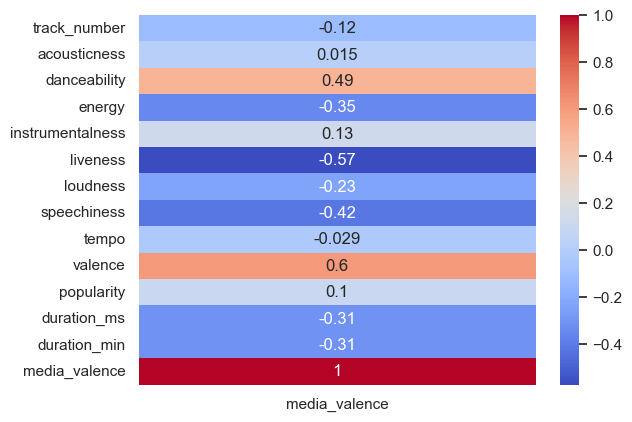

In [63]:
sns.heatmap(correlacao_sentimento.to_frame(), annot=True, cmap="coolwarm")
plt.show()

Agora iremos plotar essa informação com duas variáveis diferentes, uma que tem uma correlação forte para podemros visualizar que ambas seguem o mesmo sentido, e outra com uma correlação menor, para mostrar que seguem resultados distintos.

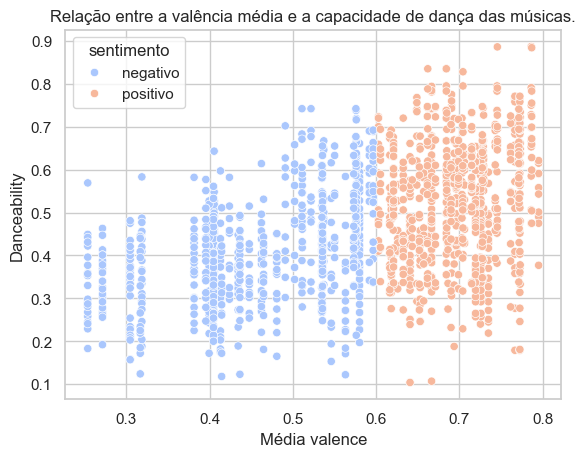

In [64]:
sns.scatterplot(x='media_valence', y='danceability', hue='sentimento', data=df_resultado_final, palette='coolwarm')
plt.xlabel("Média valence")
plt.ylabel("Danceability")
plt.title("Relação entre a valência média e a capacidade de dança das músicas.")
plt.show()

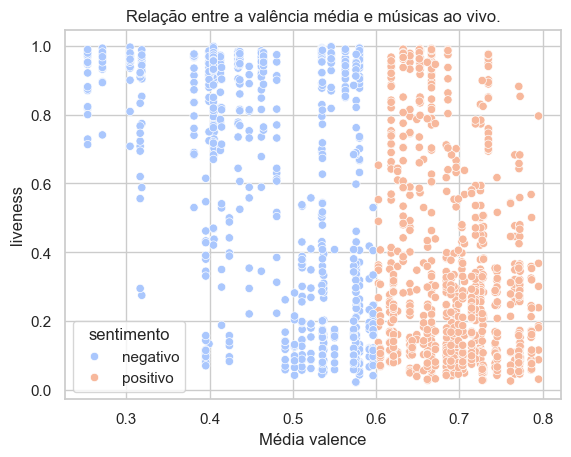

In [65]:
sns.scatterplot(x='media_valence', y='liveness', hue='sentimento', data=df_resultado_final, palette='coolwarm')
plt.xlabel("Média valence")
plt.ylabel("liveness")
plt.title("Relação entre a valência média e músicas ao vivo.")
plt.show()